In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar

In [2]:
ALL_AUCTION_DATA = 'psa_card/data/allauctionprices.csv'
TRANSACTION_DATA = 'psa_card/data/transaction.csv'
POPULATION_DATA = 'psa_card/data/population_report.csv'
CERTIFICATE_DATA = 'psa_card/data/certificate.csv'

### Step 1 : Parse all available auction data and store it in file path: ALL_AUCTION_DATA

In [3]:
all_auction_data = pd.read_csv(ALL_AUCTION_DATA, dtype=str)
# Generating year column
all_auction_data[all_auction_data.columns] = all_auction_data.apply(lambda x: x.str.strip())
all_auction_data['year'] = all_auction_data['name'].str[:4].astype('int')

In [4]:
# Visualizing auction data - head
all_auction_data.head(10)

name  \
0  1948 Topps Magic Photos All-American Basketbal...   
1  1948 Topps Magic Photos All-American Basketbal...   
2  1948 Topps Magic Photos All-American Basketbal...   
3  1948 Topps Magic Photos Basketball Thrills St....   
4  1948 Topps Magic Photos Basketball Thrills Ken...   
5  1948 Topps Magic Photos Basketball Thrills DeP...   
6           1971 Topps NBA Basketball #137 Champions   
7  1990 Hoops David Robinson #378 Basketball Full...   
8  1990 Hoops David Robinson #378 Basketball Part...   
9      1991 Hoops McDonald'S USA Basketball Team #62   

                                                 url count          category  \
0  https://www.psacard.com/auctionprices/basketba...     2  basketball_cards   
1  https://www.psacard.com/auctionprices/basketba...     3  basketball_cards   
2  https://www.psacard.com/auctionprices/basketba...     1  basketball_cards   
3  https://www.psacard.com/auctionprices/basketba...     2  basketball_cards   
4  https://www.psacard.com/auctionprices/basketba...     1  basketball_cards   
5  https://www.psacard.com/auctionprices/basketba...     1  basketball_cards   
6  https://www.psacard.com/auctionprices/basketba...    37  basketball_cards   
7  https://www.psacard.com/auctionprices/basketba...     3  basketball_cards   
8  https://www.psacard.com/auctionprices/basketba...     3  basketball_cards   
9  https://www.psacard.com/auctionprices/basketba...    27  basketball_cards   

   year  
0  1948  
1  1948  
2  1948  
3  1948  
4  1948  
5  1948  
6  1971  
7  1990  
8  1990  
9  1991

In [5]:
# Visualizing auction data - tail
all_auction_data.tail(10)

name  \
91   1994 Skybox USA Basketball Dream Play Reggie M...   
92   1994 Skybox USA Basketball Portraits Mark Pric...   
93   1994 Upper Deck USA Basketball Shaquille O'Nea...   
94   1994 Upper Deck USA Basketball Shaquille O'Nea...   
95   1994 Upper Deck USA Basketball Shaquille O'Nea...   
96   1994 Upper Deck USA Basketball Shaquille O'Nea...   
97   1994 Upper Deck USA Basketball Shaquille O'Nea...   
98   1994 Upper Deck USA Basketball Shaquille O'Nea...   
99   1994 Upper Deck USA Basketball Shaquille O'Nea...   
100  1948 Topps Magic Photos All-American Basketbal...   

                                                   url count  \
91   https://www.psacard.com/auctionprices/basketba...     1   
92   https://www.psacard.com/auctionprices/basketba...     1   
93   https://www.psacard.com/auctionprices/basketba...     1   
94   https://www.psacard.com/auctionprices/basketba...     4   
95   https://www.psacard.com/auctionprices/basketba...     2   
96   https://www.psacard.com/auctionprices/basketba...     2   
97   https://www.psacard.com/auctionprices/basketba...     2   
98   https://www.psacard.com/auctionprices/basketba...     2   
99   https://www.psacard.com/auctionprices/basketba...     1   
100  https://www.psacard.com/auctionprices/basketba...     1   

             category  year  
91   basketball_cards  1994  
92   basketball_cards  1994  
93   basketball_cards  1994  
94   basketball_cards  1994  
95   basketball_cards  1994  
96   basketball_cards  1994  
97   basketball_cards  1994  
98   basketball_cards  1994  
99   basketball_cards  1994  
100  basketball_cards  1948

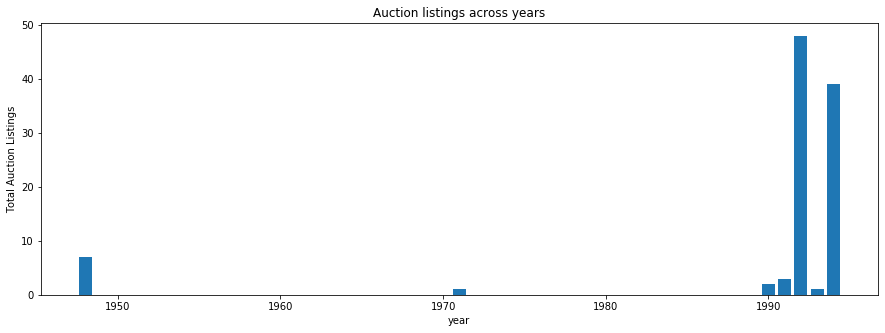

In [6]:
# Record Aggregation across years
all_auction_data_grouped_year = all_auction_data.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(15, 5))
plt.bar(all_auction_data_grouped_year['year'], all_auction_data_grouped_year['count'])
plt.xlabel('year')
plt.ylabel('Total Auction Listings')
plt.title('Auction listings across years')
plt.show()

### Discussion:
Clearly our auction listing has some antique collections from 1948 and 1971, while the majority of listings are in between 1990 and 1994

### Step 2 : 
Using the URL parsed (Ex: https://www.psacard.com/auctionprices/basketball-cards/1991-little-basketball-big-leaguers/larry-bird/summary/3232640), our downstream task collects the dollar amount across grades associated with a collection marked by year, league, and player (Example, in the above URL, the year is 1991, and the league is LITTLE BASKETBALL BIG LEAGUERS and athlete mentioned is Larry Bird. Here, 2 specific scenarios arise across each row of the card grades: (A) Statistical dollar value of the card is arranged by metrics such as Most recent price($), Average Price($), SMR Price($), 'Population', 'Pop Higher'. All the dollar value reporting metrics (marked with a dollar sign) may either be empty or have a value with/without outward links. For those with outward links - we can successfully retrieve for a given basketball player across grades, fine-grained details, (B) For the population, we can retrieve across leagues, available cards alongside important across sets. The associated card number from this page will be important in our downstream tasks. I have modeled both A, B in two RDBMS tables: population_report and transaction table. 

In [7]:
population_report = pd.read_csv(POPULATION_DATA, dtype=str)
population_report[population_report.columns] = population_report.apply(lambda x: x.str.strip())

In [8]:
# Visualizing head of the Population report table
population_report.head(10)

auction_player                              auction_league population_id  \
0    Ralph Beard  topps-magic-photos-all-american-basketball         54721   
1    Murray Wier  topps-magic-photos-all-american-basketball         54721   
2    Ed Macauley  topps-magic-photos-all-american-basketball         54721   
3   Kevin O'Shea  topps-magic-photos-all-american-basketball         54721   
4   Jim McIntyre  topps-magic-photos-all-american-basketball         54721   
5      Manhattan  topps-magic-photos-all-american-basketball         54721   
6    Ralph Beard  topps-magic-photos-all-american-basketball         54721   
7    Murray Wier  topps-magic-photos-all-american-basketball         54721   
8    Ed Macauley  topps-magic-photos-all-american-basketball         54721   
9   Kevin O'Shea  topps-magic-photos-all-american-basketball         54721   

  auction_year                                            fk_name  \
0         1948  1948 Topps Magic Photos All-American Basketbal...   
1         1948  1948 Topps Magic Photos All-American Basketbal...   
2         1948  1948 Topps Magic Photos All-American Basketbal...   
3         1948  1948 Topps Magic Photos All-American Basketbal...   
4         1948  1948 Topps Magic Photos All-American Basketbal...   
5         1948  1948 Topps Magic Photos All-American Basketbal...   
6         1948  1948 Topps Magic Photos All-American Basketbal...   
7         1948  1948 Topps Magic Photos All-American Basketbal...   
8         1948  1948 Topps Magic Photos All-American Basketbal...   
9         1948  1948 Topps Magic Photos All-American Basketbal...   

                                              fk_url fk_count  \
0  https://www.psacard.com/auctionprices/basketba...        2   
1  https://www.psacard.com/auctionprices/basketba...        2   
2  https://www.psacard.com/auctionprices/basketba...        2   
3  https://www.psacard.com/auctionprices/basketba...        2   
4  https://www.psacard.com/auctionprices/basketba...        2   
5  https://www.psacard.com/auctionprices/basketba...        2   
6  https://www.psacard.com/auctionprices/basketba...        2   
7  https://www.psacard.com/auctionprices/basketba...        2   
8  https://www.psacard.com/auctionprices/basketba...        2   
9  https://www.psacard.com/auctionprices/basketba...        2   

        fk_category                                Auth  \
0  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
2  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
3  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
4  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
5  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
6  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
7  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
8  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
9  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   

                                             1  ...  \
0           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
2  {'Grade': '         1', '+': '-', 'Q': '0'}  ...   
3  {'Grade': '         2', '+': '-', 'Q': '0'}  ...   
4           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
5           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
6           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
7           {'Grade': '0', '+': '-', 'Q': '0'}  ...   
8  {'Grade': '         1', '+': '-', 'Q': '0'}  ...   
9  {'Grade': '         2', '+': '-', 'Q': '0'}  ...   

                                                   2  \
0        {'Grade': '         2', '+': '0', 'Q': '0'}   
1  {'Grade': '         2', '+': '0', 'Q': '      ...   
2        {'Grade': '         1', '+': '0', 'Q': '0'}   
3        {'Grade': '         1', '+': '0', 'Q': '0'}   
4        {'Grade': '         2', '+': '0', 'Q': '0'}   
5        {'Grade': '         1', '+': '0', 'Q': '0'}   
6        {'Grade': 

In [9]:
# Visualizing tail of the Population report table
population_report.tail(10)

auction_player auction_league population_id auction_year  \
1152   Louie Dampier          topps         49842         1971   
1153     Roger Brown          topps         49842         1971   
1154       Joe DePre          topps         49842         1971   
1155       Ray Scott          topps         49842         1971   
1156   Arvesta Kelly          topps         49842         1971   
1157  Vann Williford          topps         49842         1971   
1158     Larry Jones          topps         49842         1971   
1159      Gene Moore          topps         49842         1971   
1160   Ralph Simpson          topps         49842         1971   
1161     Red Robbins          topps         49842         1971   

                                       fk_name  \
1152  1971 Topps NBA Basketball #137 Champions   
1153  1971 Topps NBA Basketball #137 Champions   
1154  1971 Topps NBA Basketball #137 Champions   
1155  1971 Topps NBA Basketball #137 Champions   
1156  1971 Topps NBA Basketball #137 Champions   
1157  1971 Topps NBA Basketball #137 Champions   
1158  1971 Topps NBA Basketball #137 Champions   
1159  1971 Topps NBA Basketball #137 Champions   
1160  1971 Topps NBA Basketball #137 Champions   
1161  1971 Topps NBA Basketball #137 Champions   

                                                 fk_url fk_count  \
1152  https://www.psacard.com/auctionprices/basketba...       37   
1153  https://www.psacard.com/auctionprices/basketba...       37   
1154  https://www.psacard.com/auctionprices/basketba...       37   
1155  https://www.psacard.com/auctionprices/basketba...       37   
1156  https://www.psacard.com/auctionprices/basketba...       37   
1157  https://www.psacard.com/auctionprices/basketba...       37   
1158  https://www.psacard.com/auctionprices/basketba...       37   
1159  https://www.psacard.com/auctionprices/basketba...       37   
1160  https://www.psacard.com/auctionprices/basketba...       37   
1161  https://www.psacard.com/auctionprices/basketba...       37   

           fk_category                                Auth  \
1152  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1153  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1154  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1155  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1156  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1157  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1158  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1159  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1160  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   
1161  basketball_cards  {'Grade': '0', '+': '-', 'Q': '-'}   

                                       1  ...  \
1152  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1153  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1154  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1155  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1156  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1157  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1158  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1159  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1160  {'Grade': '0', '+': '-', 'Q': '0'}  ...   
1161  {'Grade': '0', '+': '-', 'Q': '0'}  ...   

                                                2  \
1152           {'Grade': '0', '+': '0', 'Q': '0'}   
1153  {'Grade': '         1', '+': '0', 'Q': '0'}   
1154  {'Grade': '         1', '+': '0', 'Q': '0'}   
1155           {'Grade': '0', '+': '0', 'Q': '0'}   
1156           {'Grade': '0', '+': '0', 'Q': '0'}   
1157           {'Grade': '0', '+': '0', 'Q': '0'}   
1158           {'Grade': '0', '+': '0', 'Q': '0'}   
1159           {'Grade': '0', '+': '0', 'Q': '0'}   
1160           {'Grade': '0', '+': '0', 'Q': '0'}   
1161           {'Grade': '0', '+': '0', 'Q': '0'}   

                                                3  \
1152           {'Grade': '0', '+': '0', 'Q': '0'}   
1153  {'Grade': '         2', '+': '0', 'Q': '0'}   
1154         

### Discussions
The above population report table garners every piece of information available from the outward link (ex: https://www.psacard.com/pop/basketball-cards/1991/little-basketball-big-leaguers/177415) on the summary page. The foreign key columns `{fk_name, fk_url, fk_count, fk_category}` are inherited from the parent table information and can essentially be used to join back with the `all_auction_data` table. Furthermore, population_id on this table is sometimes shared among multiple players, i.e., in this table, two or more tables can have the same `population_id` mirroring the state of the page, they have been crawled from. Quantitative metrics {1, ..., 10, Total} carries the numeric score attached with Grade, +, and Q variables. They can be easily dispersed as a different column to achieve ease in analytical computation in exchange for increased space, or they can be denormalized into a different table. The argument behind the choice has been mentioned in the summary discussions which reflects my though around distributed system design concepts and denormalized data.   

In [10]:
transaction = pd.read_csv(TRANSACTION_DATA, dtype=str)
transaction[transaction.columns] = transaction.apply(lambda x: x.str.strip())

In [11]:
# Visualizing head of the Transaction table
transaction.head(10)

auction_name auction_player   value  \
0  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
1  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
2  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
3  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
4  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
5  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
6  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
7  topps-magic-photos-all-american-basketball    murray-wier  $10.61   
8  topps-magic-photos-all-american-basketball    murray-wier  $19.78   
9  topps-magic-photos-all-american-basketball    murray-wier  $19.78   

  summary_id        date  price grade    lot_number auction_house  \
0     633272  12/23/2018  10.61     5  382680512913          eBay   
1     633272   6/21/2017  19.78     3  311898718015          eBay   
2     633272  12/23/2018  10.61     5  382680512913          eBay   
3     633272   6/21/2017  19.78     3  311898718015          eBay   
4     633272  12/23/2018  10.61     5  382680512913          eBay   
5     633272   6/21/2017  19.78     3  311898718015          eBay   
6     633272  12/23/2018  10.61     5  382680512913          eBay   
7     633272   6/21/2017  19.78     3  311898718015          eBay   
8     633272  12/23/2018  10.61     5  382680512913          eBay   
9     633272   6/21/2017  19.78     3  311898718015          eBay   

  auction_seller auction_type      cert                tag  \
0   just_collect      Auction  41599722  Most Recent Price   
1        xsed58a   Buy It Now  27342757  Most Recent Price   
2   just_collect      Auction  41599722  Most Recent Price   
3        xsed58a   Buy It Now  27342757  Most Recent Price   
4   just_collect      Auction  41599722      Average Price   
5        xsed58a   Buy It Now  27342757      Average Price   
6   just_collect      Auction  41599722      Average Price   
7        xsed58a   Buy It Now  27342757      Average Price   
8   just_collect      Auction  41599722  Most Recent Price   
9        xsed58a   Buy It Now  27342757  Most Recent Price   

                                             fk_name  \
0  1948 Topps Magic Photos All-American Basketbal...   
1  1948 Topps Magic Photos All-American Basketbal...   
2  1948 Topps Magic Photos All-American Basketbal...   
3  1948 Topps Magic Photos All-American Basketbal...   
4  1948 Topps Magic Photos All-American Basketbal...   
5  1948 Topps Magic Photos All-American Basketbal...   
6  1948 Topps Magic Photos All-American Basketbal...   
7  1948 Topps Magic Photos All-American Basketbal...   
8  1948 Topps Magic Photos All-American Basketbal...   
9  1948 Topps Magic Photos All-American Basketbal...   

                                              fk_url fk_count  \
0  https://www.psacard.com/auctionprices/basketba...        2   
1  https://www.psacard.com/auctionprices/basketba...        2   
2  https://www.psacard.com/auctionprices/basketba...        2   
3  https://www.psacard.com/auctionprices/basketba...        2   
4  https://www.psacard.com/auctionprices/basketba...        2   
5  https://www.psacard.com/auctionprices/basketba...        2   
6  https://www.psacard.com/auctionprices/basketba...        2   
7  https://www.psacard.com/auctionprices/basketba...        2   
8  https://www.psacard.com/auctionprices/basketba...        2   
9  https://www.psacard.com/auctionprices/basketba...        2   

        fk_category  
0  basketball_cards  
1  basketball_cards  
2  basketball_cards  
3  basketball_cards  
4  basketball_cards  
5  basketball_cards  
6  basketball_cards  
7  basketball_cards  
8  basketball_cards  
9  basketball_cards

In [12]:
# Visualizing tail of the Transaction table
transaction.tail(10)

auction_name  auction_player  value summary_id        date   price grade  \
478        topps  nba-basketball  $9.83     296533   10/6/2017   29.99     9   
479        topps  nba-basketball  $9.83     296533    9/5/2017    2.60     8   
480        topps  nba-basketball  $9.83     296533   8/17/2017   25.00     8   
481        topps  nba-basketball  $9.83     296533    6/8/2017    9.00     8   
482        topps  nba-basketball  $9.83     296533   5/17/2017    7.99     7   
483        topps  nba-basketball  $9.83     296533   4/23/2017   12.10     9   
484        topps  nba-basketball  $9.83     296533   2/21/2017    5.85     8   
485        topps  nba-basketball  $9.83     296533   9/19/2016   10.50     9   
486        topps  nba-basketball  $9.83     296533  11/16/2012   10.13     8   
487        topps  nba-basketball  $9.83     296533   8/18/2012  100.00    10   

       lot_number           auction_house  \
478  361939660623                    eBay   
479  253122987164                    eBay   
480  272767333406                    eBay   
481           968  Sirius Sports Auctions   
482  371929411625                    eBay   
483  352029898287                    eBay   
484  381966168050                    eBay   
485  401185797113                    eBay   
486           220  Sirius Sports Auctions   
487          1040       Memory Lane, Inc.   

                                      auction_seller auction_type      cert  \
478                                  4_sharp_corners   Buy It Now  11425942   
479                             sports-cards-forever      Auction  24040658   
480                          allmaddensportcards2014   Buy It Now  30349140   
481  Sirius Sports Cards Auction # 187 - Ends 6/8/17      Auction  27286133   
482                                    surfcitycards   Buy It Now  26704305   
483                                    pwcc_auctions      Auction  81805965   
484                                     probstein123      Auction  26890348   
485                                    pwcc_auctions      Auction  26025871   
486                 Sirius Sports Cards Auction # 68      Auction  40275161   
487                              Historical Rarities      Auction  81556146   

           tag                                   fk_name  \
478  SMR Price  1971 Topps NBA Basketball #137 Champions   
479  SMR Price  1971 Topps NBA Basketball #137 Champions   
480  SMR Price  1971 Topps NBA Basketball #137 Champions   
481  SMR Price  1971 Topps NBA Basketball #137 Champions   
482  SMR Price  1971 Topps NBA Basketball #137 Champions   
483  SMR Price  1971 Topps NBA Basketball #137 Champions   
484  SMR Price  1971 Topps NBA Basketball #137 Champions   
485  SMR Price  1971 Topps NBA Basketball #137 Champions   
486  SMR Price  1971 Topps NBA Basketball #137 Champions   
487  SMR Price  1971 Topps NBA Basketball #137 Champions   

                                                fk_url fk_count  \
478  https://www.psacard.com/auctionprices/basketba...       37   
479  https://www.psacard.com/auctionprices/basketba...       37   
480  https://www.psacard.com/auctionprices/basketba...       37   
481  https://www.psacard.com/auctionprices/basketba...       37   
482  https://www.psacard.com/auctionprices/basketba...       37   
483  https://www.psacard.com/auctionprices/basketba...       37   
484  https://www.psacard.com/auctionprices/basketba...       37   
485  https://www.psacard.com/auctionprices/basketba...       37   
486  https://www.psacard.com/auctionprices/basketba...       37   
487  https://www.psacard.com/auctionprices/basketba...       37   

          fk_category  
478  basketball_cards  
479  basketball_cards  
480  basketball_cards  
481  basketball_cards  
482  basketball_cards  
483  basketball_cards  
484  basketball_cards  
485  basketball_cards  
486  basketball_cards  
487  basketball_cards

### Discussions
The transaction table crawls every bit of information from the outward link describing the fine-grained details of the transaction across grades. The page associates a given transaction to multiple certificates (with their own certificate ids) across grades. The treatment of the columns `{fk_name, fk_url, fk_count, fk_category}` as a foreign key as a utility to join back to both to population_report and all_auction_table. The `cert` column carries the unique certificate id which is in turn crawled in the downstream. 

In [13]:
certificate = pd.read_csv(CERTIFICATE_DATA, dtype=str)
certificate[certificate.columns] = certificate.apply(lambda x: x.str.strip())

In [14]:
# Visualizing head of the certificate table 
certificate.head(10)

certificate_number reverse_cert_number  year  \
0           27888603                 Yes  1971   
1           81805965                 NaN  1971   
2           03715098                 NaN  1971   
3           27893360                 Yes  1948   
4           19810382                 NaN  1971   
5           21845022                 NaN  1948   
6           26279843                 Yes  1948   
7           27092363                 Yes  1971   
8           45311238                 Yes  1971   
9           27286133                 Yes  1971   

                                        brand             sport card_number  \
0                                       TOPPS  BASKETBALL CARDS         137   
1                                       TOPPS  BASKETBALL CARDS         137   
2                                       TOPPS  BASKETBALL CARDS         137   
3  TOPPS MAGIC PHOTOS ALL-AMERICAN BASKETBALL  BASKETBALL CARDS          3B   
4                                       TOPPS  BASKETBALL CARDS         137   
5       TOPPS MAGIC PHOTOS BASKETBALL THRILLS  BASKETBALL CARDS          4Q   
6       TOPPS MAGIC PHOTOS BASKETBALL THRILLS  BASKETBALL CARDS          1Q   
7                                       TOPPS  BASKETBALL CARDS         137   
8                                       TOPPS  BASKETBALL CARDS         137   
9                                       TOPPS  BASKETBALL CARDS         137   

                player      variety_or_pedigree       grade        date  \
0       NBA BASKETBALL                CHAMPIONS      MINT 9   8/29/2020   
1       NBA BASKETBALL                CHAMPIONS      MINT 9   4/23/2017   
2       NBA BASKETBALL                CHAMPIONS     NM-MT 8   5/31/2020   
3          ED MACAULEY  ALL AMERICAN BASKETBALL        VG 3  12/12/2017   
4       NBA BASKETBALL                CHAMPIONS      MINT 9  12/30/2019   
5       KENTUCKY 58-42       BASKETBALL THRILLS        VG 3    8/3/2020   
6  ST.LOUIS UNIVERSITY       BASKETBALL THRILLS     VG-EX 4  11/13/2016   
7       NBA BASKETBALL                CHAMPIONS   GEM MT 10   2/20/2019   
8       NBA BASKETBALL                CHAMPIONS  VG-EX+ 4.5   2/24/2020   
9       NBA BASKETBALL                CHAMPIONS     NM-MT 8    6/8/2017   

     price            auction_house  \
0   $40.00        eBay (nhcardguys)   
1   $12.10     eBay (pwcc_auctions)   
2   $16.00           eBay (mrcrx33)   
3   $39.99       eBay (dandaman333)   
4   $32.00           eBay (bsatttu)   
5  $100.00          eBay (johndb63)   
6   $14.55      eBay (just_collect)   
7  $209.99  eBay (graded_psa_cards)   
8    $3.25      eBay (probstein123)   
9    $9.00   Sirius Sports Auctions   

                                          lot_number  \
0  <a href="/auctionprices/auction/4317201" targe...   
1  <a href="/auctionprices/auction/257363" target...   
2  <a href="/auctionprices/auction/3802272" targe...   
3  <a href="/auctionprices/auction/445931" target...   
4  <a href="/auctionprices/auction/3233311" targe...   
5  <a href="/auctionprices/auction/4160266" targe...   
6  <a href="/auctionprices/auction/857357" target...   
7  <a href="/auctionprices/auction/2360326" targe...   
8  <a href="/auctionprices/auction/3331324" targe...   
9  <a href="/auctionprices/auction/1499954" targe...   

                                    registry_set_msg registry_set_url  \
0                                    ['None found.']              NaN   
1  ['\n            This cert is currently in ', <...              NaN   
2                                    ['None found.']              NaN   
3                                    ['None found.']              NaN   
4  ['\n            This cert is currently in ', <...              NaN   
5                                    ['None found.']              NaN   
6                                    ['None found.']              NaN   
7                                    ['None found.']              NaN   
8                                    ['None found.'

In [15]:
# Visualizing tail of the certificate table 
certificate.tail(10)

certificate_number reverse_cert_number  year  \
30           20590716                 NaN  1971   
31           26704305                 Yes  1971   
32           23352232                 NaN  1971   
33           26890348                 Yes  1971   
34           27342757                 Yes  1948   
35           27342754                 Yes  1948   
36           41531412                 Yes  1971   
37           41599722                 Yes  1948   
38           22595538                 Yes  1971   
39           24897542                  No  1948   

                                         brand             sport card_number  \
30                                       TOPPS  BASKETBALL CARDS         137   
31                                       TOPPS  BASKETBALL CARDS         137   
32                                       TOPPS  BASKETBALL CARDS         137   
33                                       TOPPS  BASKETBALL CARDS         137   
34  TOPPS MAGIC PHOTOS ALL-AMERICAN BASKETBALL  BASKETBALL CARDS          2B   
35  TOPPS MAGIC PHOTOS ALL-AMERICAN BASKETBALL  BASKETBALL CARDS          3B   
36                                       TOPPS  BASKETBALL CARDS         137   
37  TOPPS MAGIC PHOTOS ALL-AMERICAN BASKETBALL  BASKETBALL CARDS          2B   
38                                       TOPPS  BASKETBALL CARDS         137   
39       TOPPS MAGIC PHOTOS BASKETBALL THRILLS  BASKETBALL CARDS          1Q   

                 player      variety_or_pedigree      grade        date  \
30       NBA BASKETBALL                CHAMPIONS    NM-MT 8   3/21/2018   
31       NBA BASKETBALL                CHAMPIONS       NM 7   5/17/2017   
32       NBA BASKETBALL                CHAMPIONS    NM-MT 8   3/13/2019   
33       NBA BASKETBALL                CHAMPIONS    NM-MT 8   2/21/2017   
34          MURRAY WIER  ALL AMERICAN BASKETBALL       VG 3   6/21/2017   
35          ED MACAULEY  ALL AMERICAN BASKETBALL    VG-EX 4   6/29/2017   
36       NBA BASKETBALL                CHAMPIONS  GEM MT 10   4/10/2019   
37          MURRAY WIER  ALL AMERICAN BASKETBALL       EX 5  12/23/2018   
38       NBA BASKETBALL                CHAMPIONS  GEM MT 10   7/23/2020   
39  ST.LOUIS UNIVERSITY       BASKETBALL THRILLS       EX 5   5/28/2020   

      price             auction_house  \
30   $12.00        eBay (bbcexchange)   
31    $7.99      eBay (surfcitycards)   
32    $6.50          eBay (tomdances)   
33    $5.85       eBay (probstein123)   
34   $19.78            eBay (xsed58a)   
35   $29.78            eBay (xsed58a)   
36  $120.46       eBay (probstein123)   
37   $10.61       eBay (just_collect)   
38  $224.50      eBay (pwcc_auctions)   
39   $75.00  eBay (princecaspian2010)   

                                           lot_number  \
30  <a href="/auctionprices/auction/1483408" targe...   
31  <a href="/auctionprices/auction/1126533" targe...   
32  <a href="/auctionprices/auction/3828825" targe...   
33  <a href="/auctionprices/auction/145626" target...   
34  <a href="/auctionprices/auction/477549" target...   
35  <a href="/auctionprices/auction/477489" target...   
36  <a href="/auctionprices/auction/2491317" targe...   
37  <a href="/auctionprices/auction/2200741" targe...   
38  <a href="/auctionprices/auction/4056734" targe...   
39  <a href="/auctionprices/auction/3764775" targe...   

                                     registry_set_msg registry_set_url  \
30                                    ['None found.']              NaN   
31                                    ['None found.']              NaN   
32                                    ['None found.']              NaN   
33  ["This cert is currently in a user's private s...              NaN   
34                                    ['None found.']              NaN   
35  ['\n            This cert is currently in ', <...              NaN   
36  ['\n            This cert is currently in ', <...              NaN   
37  ['\n            This cert is currently in ', <...         

### Discussions: 
The certificate table contains fine-grained certificate table information and can be tied back using the `cert` column using the upstream table. The quantitative assessment columns such as `price` can be converted to dollars using the below-mentioned dataframe transform or in the upward analytical storage columns. The data-modeling has been kept highly flexible and can be re-modeled in ETL or migration to analytical data warehouses for all of the tables. 

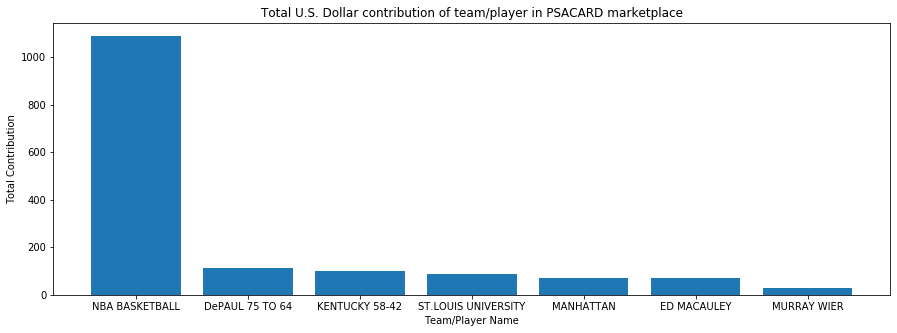

In [16]:
certificate['price_in_dollars'] = certificate['price'].str.replace('$', '').astype('float')
certificate_player_contribution = certificate[['player', 'price_in_dollars']].groupby('player').sum(\
                                                                                                   ).reset_index().sort_values('price_in_dollars', ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(certificate_player_contribution['player'], certificate_player_contribution['price_in_dollars'])
plt.xlabel('Team/Player Name')
plt.ylabel('Total Contribution')
plt.title('Total U.S. Dollar contribution of team/player in PSACARD marketplace')
plt.show()

# Pipelining Code

The attached zip with this report contains the scripts used in pipeling the jobs. There are two schemes of running this file. <br/>
<b>(A) From the terminal, using the entry-point meant to assimilate the code. </b>
![Demo of the terminal screen](psa_card/Terminal_Demo.PNG)


<b> Using Schedulers - Airflow </b> <br/>
![Demo of the Airflow (Part - 1)](psa_card/Airflow_Demo1.PNG)

### Using Schedulers (Part-2)
![Demo of the Airflow (Part - 2)](psa_card/Airflow_Demo2.PNG)

### Runtime compelexity discussion
![Runtime Complexity](psa_card/Airflow_Demo3.PNG)

N.B: All of these images are in the res folder in the attached zip, should you find some of them hazy. I have also attached the airflow DAG configuration which can be used to direcly run the complete pipeline on another system.  

## Architecture Complexity
The above image quantitatively reports the fraction of the total time taken by the complete pipeline which has been used by each of the individual job-tasks. While refresh_auction_listing took around 8.5 seconds, around 10 minutes was spent on the immediate downstream task populate_transaction_tables and a little over 5 minutes by the final task in the pipeline. While, the pipeline in its current design, made use of nothing more than a single processor core, and populate_transaction_tables had a lot of heavy-lifting assigned to it. An immediate performance optimization (from an engineering standpoint) can be leveraged using multiprocessing or map-reduce over sharding splits. In the first strategy, for an available 'N' number of cores, the code would parallelly perform crawling for N tasks rather than doing them sequentially, which would enable us to harness more efficient utilization of the CPU time. Assuming, an average time spent of 'y' in each crawl given 'N' - parallel processing, we might be able to reach close to an ideal value of `yn/N` architectural boost, where 'n' is the total number of independent crawls performed. In the second strategy, given our understanding of the current pipeline that the downstream task of `populate_transaction_tables` doesn't start until all the available listings are fetched by `refresh_auction_listing`. We can essentially map the domain of our current problem to an effective distributed map-reduced strategy, wherein for a given 'N' task-nodes (splits/available worker nodes), we can employ an efficient distribution scheme of assigning equal tasks (or, loads) to the worker nodes. One nearly fair would be sharding, where we can essentially use the mod of an ordinary hash function to assign each split their respective worker nodes. Each worker node would then independently crawl their quota of data-rows for the two tables, which we could assimilate it back to the file system.

One of the strong motivations to go with denormalized data over normalizations across multiple tables was also strongly motivated by the concerns that the present architecture crawls data over the internet into the raw or first landing point of the data lake. In Big Data ecosystems, we strongly want the data to be as much denormalized as efficient as that would enable us to lower our costs of read-replications, sharding, and data storage. Further, the treatments of such raw layers are very diverse around teams and business structures. There are applications wherein expensive table-joins are averted by maintaining a denormalized dataset (which adds to the storage complexity and storage costs) as a tradeoff for cheaper, faster compute, and faster access across data-field. In contrast, certain applications motivate consistency and may not be expecting to use too many joins or a wider data-view. Such concerns are efficiently handled by migrating the data to built-to-purpose data warehouse or lake, wherein application/domain recommendation treatments to the data model and schema further aid to the elegance of engineering sophisticated data pipelines

## Advanced Treatment
1) To ensure the system's high-availability and recovery-checkpoints for disaster-recovery efforts, the data should be migrated from the raw layer to the respective Data-Marts/Warehouses and fast/slow OLAP layers supporting read replication. Having read replications at law layers is also an important consideration to avoid faulty ETL or data-sync pipelines corrupting/deleting the raw data. A recommended solution is to go with at least 3 copies of the transformed data in the mature layers and at least 2 copies in the raw or less-mature data layers. 
2) Fault Tolerance: In the context of the present design, We should partition our file system underneath the raw layer based on ingestion timestamps (year=2020/month=9/day=08) and the exposed schematics (like schema_name/schema_file_name). For highly materialized raw ingestion, I could recommend having more partitions based on a cluster the data closely aligns with (like business units who would be first beneficiaries, such as /finance, /hr, /marketing, etc.) or use-cases in case of highly agile and fluidic teams. If the data brought in is highly disjoint and atomic, less partitioning would also be an equally compelling choice. Another real-world concern in partitioning is data-access levels. In the presence of limited partitions, more data pipelines would have visibility, control, and access in the same folder structures. Concerns of privacy and throughput motivate one aspect of such design, the other aspect is motivated by factors such as accidental delete of the entire folder by a faulty engineering pipeline impacting several teams. 
3) Sophisticated data encryptions and anonymization algorithms are salient characteristics in higher, mature data layers, it's very common to as well find some data encryption, anonymization being employed in the raw layers. Such recommendations are as well very subjective motivated by the understanding of security in the 'data-at-rest' platforms, frequency, length of movement of data to ensure an added confidence of data breach, corruption while at rest or in transit. For connected Big Data ecosystems, it may sometime assume even crucial stand specifically when the ecosystem hosts a lot of third-party platforms like Data Visualization Softwares, etc.  

## Choice of Technology: 
<b>1) Programming Language:</b> Python - efficient, fast to prototype pipelines. Excellent support with data-wrangling tools like Python, code support tasks. Jave would also be an efficient choice for building an ETL pipeline as it as well inherits all the same advantages. <br/> <br/>
<b>2) Scheduler:</b> Oozie/Airflow - equally good scheduling tools for book-keeping, advanced pipelining (multiple flow dependencies, etc.). Excellent UI and poweful inbuilt set of utilities were my primary concerns while making a pick between either of them. Light-weight Azkaban is my favorite, but I am good exposure in all three of the mentioned tools. <br/> <br/>
<b>3) Database:</b> RDBMS/No-SQL depending on the scope of the development. If the development is expected to stretch longer, We, the engineering team, are constantly threatened by even small updates to the webpage which may break the established pipeline in production. In that case, it's a better choice to use NoSQL and ingest the data into our lowest stack of Data Lake. On the contrary, if the lifetime of the pipeline is shorter, We would be more concentrated on robustness, data compliance, and data integrity. From there, with the help of ETL pipelines, we can disperse the data into both RDBMS and NoSQL data warehouses, depending on the end application supported (REST/Visualization Tool/Machine Learning Pipelines, etc.) and our expectations from the data lake in terms of latency and throughput (Fast Access Layers, Slow Access Layers, etc.) Depending on the software stack, Redshift/DynamoDB, HBASE(with/without SQL skin like Phoenix) on AWS or BigQuery/BigTable on Google Cloud or Hive, SQL Cloud/CosmosDB on Azure or with Spark stacks on Databricks are all well-respected solutions. I have used all the technologies mentioned in the database stack in different stages of my employment, and I bring with me the experience of tackling them efficiently. The choice of database stack is also heavily concentrated on the types of applications where such data would be immediately employed. For example, Machine Learning teams would stress on capturing the diversity of the data, such as not letting go of any fraction of data, even if their relative volume is not significant (for example, a large set of the data field which has not been on the webpage, throughout) or some software application engineering teams would want to keep only stable data fields (provided those excluded were not a set of fields which are deemed at the crucial at the point in time). However, most teams lie in between the spectrum of two extremes, and such decisions are more often motivated by engineering management practices such as whether to bear extra resources for engineering or maintenance or even choices like restricting the technological landscape the team owns to mitigate increasing technical debts, etc.  <br/>